<img src='https://user-images.githubusercontent.com/6457691/89746244-a6e2a200-daf3-11ea-9314-7863d544d73c.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 3*

# 📝 Assignment

---

## 1. Concat 

세션시간에 다뤘던 6개의 데이터를 1개로 합치세요.

데이터를 불러오기 위하여 아래의 코드를 참조하세요.

합쳐진 데이터의 이름은 `df`입니다.

```python
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv') 
# '000890.csv'
# '005300.csv'
# '027740.csv'
# '035810.csv'
# '136480.csv'
```



단, 모든 feature, 모든 데이터에 대해서가 아닌

- 매출액
- 자본총계
- EPS

- 제일 최근 분기의 데이터

에 대해서만 하면 됩니다.

||매출액|자본총계|EPS(원)|종목명|
|:-:|:-:|:-:|:-:|:-:|
|2020/09|6,243|10,897|453|하이트진로|
|...|...|...|...|...|
|2020/09|2,613|2,695|62|하림|

(첫부분은 값이 달라도 되며, 결과 shape는 6,4입니다.)

힌트 : 
- 데이터를 transpose
- column의 이름을 변경 및 설정
- 데이터의 일부 feature 선택
- `종목명`이라는 feature 지정
- 이후 `concat`으로 합치기
- 합친 이후의 index를 종목명으로 설정 및 drop

이라는 단계를 거치면 될겁니다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 4s (2,476 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
#barplot 한글 깨짐 해결을 위한 한글 폰트 불러오기
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [ ]:
import pandas as pd
 
urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv') 
df2 = pd.read_csv(urlhead + '000890.csv')
df3 = pd.read_csv(urlhead + '005300.csv')
df4 = pd.read_csv(urlhead + '027740.csv')
df5 = pd.read_csv(urlhead + '035810.csv')
df6 = pd.read_csv(urlhead + '136480.csv')

In [ ]:
df1 = pd.read_csv(urlhead + '000080.csv').transpose()
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
Unnamed: 0,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
2019/09\n(IFRS연결),"5,291",492,492,348,258,259,0,"34,061","23,056","11,005","10,998",NaN,"3,688","2,079",-347,-395,483,"1,597","12,615",9.29,4.88,-1.46,-0.50,209.50,220.33,363,NaN,"15,761",1.73,0,NaN,0.00,"70,133,611"
2019/12\n(IFRS연결),"5,586",327,327,39,-252,-251,0,"32,709","22,377","10,332","10,325",NaN,"3,688",601,-475,-910,462,139,"11,715",5.85,-4.50,-3.86,-1.27,216.58,202.85,-353,NaN,"14,796",1.96,700,NaN,-194.53,"70,133,611"
2020/03\n(IFRS연결),"5,339",561,561,450,334,334,0,"36,368","26,164","10,204","10,198",5,"3,688","1,230",-416,"2,713",430,800,"14,452",10.51,6.25,0.46,0.14,256.41,198.70,469,390.26,"14,614",1.84,NaN,NaN,0.00,"70,133,611"
2020/06\n(IFRS연결),"5,816",541,541,487,349,349,0,"43,007","32,393","10,613","10,608",6,"3,688","5,437",-494,"1,617",362,"5,075","16,576",9.30,5.99,6.48,1.79,305.21,208.16,489,45.23,"15,201",2.88,NaN,NaN,0.00,"70,133,611"
2020/09\n(IFRS연결),"6,243",644,644,465,322,323,0,"39,617","28,720","10,897","10,893",5,"3,688","-3,009",-410,-594,382,"-3,391","15,995",10.31,5.17,6.89,2.04,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"


In [ ]:
def mydf(url):
    df = pd.read_csv(urlhead + url).transpose()
    new_header = df.iloc[0] 
    df = df[1:] 
    df.columns = new_header 
    return df
df1 = mydf('000080.csv')
df2 = mydf('000890.csv')
df3 = mydf('005300.csv')
df4 = mydf('027740.csv')
df5 = mydf('035810.csv')
df6 = mydf('136480.csv')

In [ ]:
df = pd.concat([df1, df2, df3, df4, df5, df6])
df.shape

(30, 33)

In [ ]:
def mydf(myurl):
    df = pd.read_csv(urlhead + myurl).transpose()
    new_header = df.iloc[0] 
    df = df[1:] 
    df.columns = new_header 
    return df[-1:]

df = pd.concat([mydf('000080.csv'), mydf('000890.csv'), mydf('005300.csv'), mydf('027740.csv'), mydf('035810.csv'), mydf('136480.csv')])
df = df.reset_index()
df = df.drop(df.columns[0], axis=1)
    
df

Unnamed: 0,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
0,"6,243",644,644,465,322,323,0,"39,617","28,720","10,897","10,893",5,"3,688","-3,009",-410,-594,382,"-3,391","15,995",10.31,5.17,6.89,2.04,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"
1,205,6,6,5,4,4,NaN,"1,555",739,816,816,NaN,637,-42,-10,-34,18,-60,465,2.92,2.15,-17.61,-8.99,90.59,27.50,3,NaN,640,1.41,NaN,NaN,NaN,"127,449,373"
2,"5,980",293,293,194,155,147,7,"34,066","21,970","12,096","11,942",154,44,"1,284",-958,"1,009",315,969,"15,489",4.90,2.59,-7.07,-2.50,181.63,"43,300.25","1,682",NaN,"145,448",0.70,0,NaN,0.00,"7,993,460"
3,521,-89,-89,-104,-104,-104,0,"1,897","1,273",624,622,2,792,39,39,-85,3,36,839,-17.17,-19.95,-50.65,-21.41,204.06,-33.01,-61,NaN,368,2.37,0,NaN,0.00,"168,807,631"
4,"4,108",246,246,816,657,659,-1,"18,966","11,432","7,534","4,351","3,183",282,-33,-103,"1,051",82,-115,"8,639",5.98,16.00,17.65,2.18,151.74,"1,538.72","1,168",3.98,"7,821",0.64,NaN,NaN,0.00,"55,640,623"
5,"2,613",1,1,17,66,66,0,"8,550","5,855","2,695","2,689",6,531,150,-233,-257,127,23,"5,016",0.06,2.51,0.69,0.20,217.22,473.10,62,141.13,"2,532",1.01,NaN,NaN,NaN,"106,209,702"


In [ ]:
pname = pd.DataFrame(
    {'종목' : ['000080', '000890', '005300', '027740', '035810', '136480', '136490'],
     '종목명': ['하이트진로', '보해양조', '롯데칠성', '마니커', '이지홀딩스', '하림', '선진'], 
     '테마' : ['주류', '주류', '주류', '육계', '육계', '육계', '돼지고기']}
)
pname

,종목,종목명,테마
0,000080,하이트진로,주류
1,000890,보해양조,주류
2,005300,롯데칠성,주류
3,027740,마니커,육계
4,035810,이지홀딩스,육계
5,136480,하림,육계
6,136490,선진,돼지고기


In [ ]:
df = pd.concat([pname, df], axis = 1)
df.columns = df.columns.str.strip()
df

,종목,종목명,테마,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
0,000080,하이트진로,주류,"6,243",644,644,465,322,323,0,"39,617","28,720","10,897","10,893",5,"3,688","-3,009",-410,-594,382,"-3,391","15,995",10.31,5.17,6.89,2.04,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"
1,000890,보해양조,주류,205,6,6,5,4,4,NaN,"1,555",739,816,816,NaN,637,-42,-10,-34,18,-60,465,2.92,2.15,-17.61,-8.99,90.59,27.50,3,NaN,640,1.41,NaN,NaN,NaN,"127,449,373"
2,005300,롯데칠성,주류,"5,980",293,293,194,155,147,7,"34,066","21,970","12,096","11,942",154,44,"1,284",-958,"1,009",315,969,"15,489",4.90,2.59,-7.07,-2.50,181.63,"43,300.25","1,682",NaN,"145,448",0.70,0,NaN,0.00,"7,993,460"
3,027740,마니커,육계,521,-89,-89,-104,-104,-104,0,"1,897","1,273",624,622,2,792,39,39,-85,3,36,839,-17.17,-19.95,-50.65,-21.41,204.06,-33.01,-61,NaN,368,2.37,0,NaN,0.00,"168,807,631"
4,035810,이지홀딩스,육계,"4,108",246,246,816,657,659,-1,"18,966","11,432","7,534","4,351","3,183",282,-33,-103,"1,051",82,-115,"8,639",5.98,16.00,17.65,2.18,151.74,"1,538.72","1,168",3.98,"7,821",0.64,NaN,NaN,0.00,"55,640,623"
5,136480,하림,육계,"2,613",1,1,17,66,66,0,"8,550","5,855","2,695","2,689",6,531,150,-233,-257,127,23,"5,016",0.06,2.51,0.69,0.20,217.22,473.10,62,141.13,"2,532",1.01,NaN,NaN,NaN,"106,209,702"
6,136490,선진,돼지고기,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop(6)
df

,종목,종목명,테마,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
0,000080,하이트진로,주류,"6,243",644,644,465,322,323,0,"39,617","28,720","10,897","10,893",5,"3,688","-3,009",-410,-594,382,"-3,391","15,995",10.31,5.17,6.89,2.04,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"
1,000890,보해양조,주류,205,6,6,5,4,4,NaN,"1,555",739,816,816,NaN,637,-42,-10,-34,18,-60,465,2.92,2.15,-17.61,-8.99,90.59,27.50,3,NaN,640,1.41,NaN,NaN,NaN,"127,449,373"
2,005300,롯데칠성,주류,"5,980",293,293,194,155,147,7,"34,066","21,970","12,096","11,942",154,44,"1,284",-958,"1,009",315,969,"15,489",4.90,2.59,-7.07,-2.50,181.63,"43,300.25","1,682",NaN,"145,448",0.70,0,NaN,0.00,"7,993,460"
3,027740,마니커,육계,521,-89,-89,-104,-104,-104,0,"1,897","1,273",624,622,2,792,39,39,-85,3,36,839,-17.17,-19.95,-50.65,-21.41,204.06,-33.01,-61,NaN,368,2.37,0,NaN,0.00,"168,807,631"
4,035810,이지홀딩스,육계,"4,108",246,246,816,657,659,-1,"18,966","11,432","7,534","4,351","3,183",282,-33,-103,"1,051",82,-115,"8,639",5.98,16.00,17.65,2.18,151.74,"1,538.72","1,168",3.98,"7,821",0.64,NaN,NaN,0.00,"55,640,623"
5,136480,하림,육계,"2,613",1,1,17,66,66,0,"8,550","5,855","2,695","2,689",6,531,150,-233,-257,127,23,"5,016",0.06,2.51,0.69,0.20,217.22,473.10,62,141.13,"2,532",1.01,NaN,NaN,NaN,"106,209,702"


In [ ]:
df = df[['종목명','매출액','자산총계','EPS(원)']]
df.replace(',','', regex=True, inplace=True)
df['매출액'] = pd.to_numeric(df['매출액'])
df['자산총계'] = pd.to_numeric(df['자산총계'])
df.dtypes

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

종목명       object
매출액        int64
자산총계       int64
EPS(원)    object
dtype: object

In [ ]:
df.shape

(6, 4)

In [ ]:
df['매출액'][2] == 5980

True

In [ ]:
df['자산총계'][3] == 1897

True

## 2. Reshape 

방금 만든 데이터를 아래 예시와 같은 **tidy** 형태로 만드세요.

이때 tidy 데이터의 이름은 `df_tidy` 입니다.

|종목명|Feature|Value|
|:-:|:-:|:-:|
|하이트진로|매출액|6243|
|보해양조|매출액|205|
|롯데칠성|매출액|5980|
|...|...|...|
|마니커|EPS(원)|-61|
|이지홀딩스|EPS(원)|1168|
|하림|EPS(원)|62|

이 후 아래의 코드를 정상적으로 실행했을때 나오는 box의 수를 `res`에 저장하세요.

```python
sns.boxplot(data = df_tidy, x = '종목명', y = 'value');
```




In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns


df_tidy = df.reset_index()
df_tidy = df_tidy.melt(id_vars = '종목명', value_vars = ['매출액','자산총계','EPS(원)'])
df_tidy = df_tidy.rename(
    columns = {
        'index' : '종목명',
        'variable': 'feature',
        'value': 'value'
        }
)
df_tidy = df_tidy.replace(',','', regex=True)
df_tidy['value'] = pd.to_numeric(df_tidy['value'])
df_tidy.dtypes
df_tidy

,종목명,feature,value
0,하이트진로,매출액,6243
1,보해양조,매출액,205
2,롯데칠성,매출액,5980
3,마니커,매출액,521
4,이지홀딩스,매출액,4108
5,하림,매출액,2613
6,하이트진로,자산총계,39617
7,보해양조,자산총계,1555
8,롯데칠성,자산총계,34066
9,마니커,자산총계,1897


In [ ]:
(df_tidy['value'].mean(), 3)

(7090.444444444444, 3)

In [ ]:
(round(df_tidy['value'].mean(), 3) == 7090.444)

True

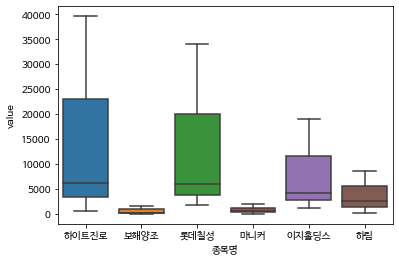

In [ ]:
import seaborn as sns
sns.boxplot(data = df_tidy, x = '종목명', y = 'value');

In [ ]:
res = 6

## 3. Merge & Join +

pandas merge의 options중 how 에는 여러가지 옵션들이 있습니다.

공식 레퍼런스를 검색, 참조하여

아래 코드를 바탕으로 

다음과 같은 결과물을 만드는 코드를 작성하세요

변수의 이름은 `df2` 입니다.

|key1|key2|A|B|C|D|
|:-:|:-:|:-:|:-:|:-:|:-:|
|K0|K0|A0|B0|C0|D0|
|K0|K1|A1|B1|NaN|NaN|
|K1|K0|A2|B2|C1|D1|
|K1|K0|A2|B2|C2|D2|
|K2|K1|A3|B3|NaN|NaN|





In [ ]:
import pandas as pd

left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [ ]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [ ]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [ ]:
df2 = left.merge(right, how='outer', left_on = ['key1','key2'], right_on = ['key1','key2'])
df2 = df2.drop(5)
df2

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [ ]:
df2 = pd.merge(left, right, how = 'left')
df2

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [ ]:
(df2.equals(pd.DataFrame({
    'key1' : ['K0', 'K0', 'K1', 'K1', 'K2'],
    'key2' : ['K0', 'K1', 'K0', 'K0', 'K1'],
    'A' : ['A0', 'A1', 'A2', 'A2', 'A3'],
    'B' : ['B0', 'B1', 'B2', 'B2', 'B3'],
    'C' : ['C0', np.NaN, 'C1', 'C2', np.NaN],
    'D' : ['D0', np.NaN, 'D1', 'D2', np.NaN],
  }))) 

True

## Grading

이전 과제를 완료했다면, 아래의 코드를 실행하세요. 

In [ ]:
import numpy as np

def grade(df, df2, df_tidy, res):
  score = 0
  score += (df['매출액'][2] == 5980)
  score += (df['자산총계'][3] == 1897)   
  score += (df2.equals(pd.DataFrame({
    'key1' : ['K0', 'K0', 'K1', 'K1', 'K2'],
    'key2' : ['K0', 'K1', 'K0', 'K0', 'K1'],
    'A' : ['A0', 'A1', 'A2', 'A2', 'A3'],
    'B' : ['B0', 'B1', 'B2', 'B2', 'B3'],
    'C' : ['C0', np.NaN, 'C1', 'C2', np.NaN],
    'D' : ['D0', np.NaN, 'D1', 'D2', np.NaN],
  }))) 
  score += (round(df_tidy['value'].mean(), 3) == 7090.444)
  score += (res == 6)
  return(score)

In [ ]:
grade(df, df2, df_tidy, res)

5

## 🔥 도전과제

아래 링크들을 참조하여, 
특정 테마별로 포함되어 있는 종목의 데이터를 직접 csv형태로 수집하고 (아래 적힌 3개씩)

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=408>

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=36>

- 최종 분기에 해당하는 데이터

- 테마별 평균 데이터를 결과물로 만드는 코드를 작성하세요.

단, 모든 feature에 대해서가 아닌

- 매출액
- 자본총계
- EPS

에 대해서만 하면 됩니다.

|종목명|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|대한해운|...|...|...|...|
|팬오션|...|...|...|...|
|KSS해운|...|...|...|...|
|세미콘라이트|...|...|...|...|
|오성첨단소재|...|...|...|...|
|에이아이비트|...|...|...|...|

---

|테마|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|해운|...|...|...|
|마리화나(대마)|...|...|...|

이후 아래의 예시 처럼 seaborn을 사용하여 결과를 barplot으로 시각화하세요.

단, 한글이 깨지는 에러를 여러분이 직접 고쳐야합니다.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving stock.csv to stock.csv


In [ ]:
import pandas as pd
import seaborn as sns

x = pd.read_csv('stock.csv')
x1 = pd.DataFrame({'테마' : ['해운','해운','해운','마리화나(대마)','마리화나(대마)','마리화나(대마)']})

In [ ]:
x = x.merge(x1, how = 'left', left_index = True, right_index = True)

x

,종목명,매출액,자본총계,EPS(원),테마
0,대한해운,2222,8533,23,해운
1,팬오션,6205,28067,-26,해운
2,KSS해운,546,2689,-237,해운
3,세미콘라이트,66,470,-363,마리화나(대마)
4,오성첨단소재,184,1944,8,마리화나(대마)
5,에이아이비트,57,453,-187,마리화나(대마)


In [ ]:
data = x.groupby('테마').mean().round()
data

,매출액,자본총계,EPS(원)
테마,,,
마리화나(대마),102.0,956.0,-181.0
해운,2991.0,13096.0,-80.0


In [ ]:
vis = x.melt(id_vars = '테마', value_vars = ['매출액', '자본총계', 'EPS(원)'])
vis

,테마,variable,value
0,해운,매출액,2222
1,해운,매출액,6205
2,해운,매출액,546
3,마리화나(대마),매출액,66
4,마리화나(대마),매출액,184
5,마리화나(대마),매출액,57
6,해운,자본총계,8533
7,해운,자본총계,28067
8,해운,자본총계,2689
9,마리화나(대마),자본총계,470


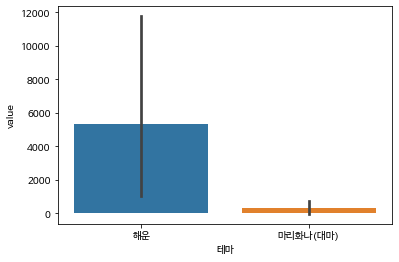

In [ ]:
sns.barplot(x = '테마', y = 'value', data = vis);

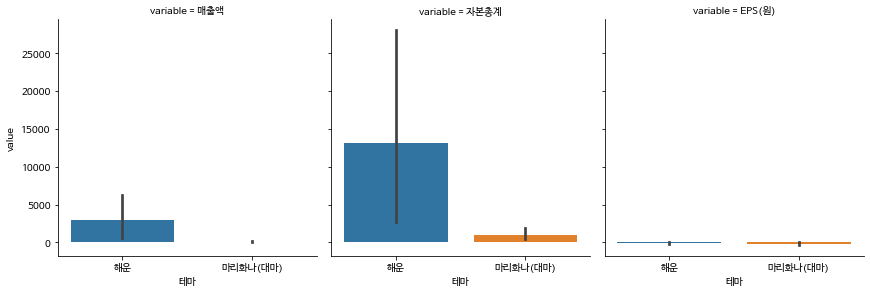

In [ ]:
sns.catplot(x = '테마', y ='value', col = 'variable', kind = 'bar', data = vis, height = 4);